We use our most advanced technologies as metaphors for the brain: Water technology inspired the idea of four humours. The industrial revolution inspired descriptions of the brain as mechanical. The telephone inspired descriptions of the brain as a telephone switchboard. The computer inspired descriptions of the brain as a computer. We have reached an amazing point in history where our most advanced technologies - such as AI (e.g., [Alpha Go](https://en.wikipedia.org/wiki/AlphaGo)), and our current understanding of the brain have entered an awesome synergy. Neural networks exemplify this synergy. Neural networks offer a relatively advanced description of the brain and are the software underlying some of our most advanced technology. As our understanding of the brain increases, neural networks become more sophisticated. As our understanding of neural networks increases our understanding of the brain becomes more sophisticated. 

With the recent success of neural networks, I thought it would be useful to write a few posts describing the basics of neural networks. 

Lets get started.

As usual, I will post this code as a jupyter notebook on [my github](https://github.com/dvatterott/jupyter_notebooks). 

In [1]:
import numpy as np #import important libraries. 
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline


When talking about neural networks, it's nice to visualize the network with a figure. For drawing the neural networks, I forked a [repository from miloharper](https://github.com/miloharper/visualise-neural-network) and made some changes so that this repository could be imported into python and so that I could label the network. [Here](https://github.com/dvatterott/visualise_neural_network) is my forked repository.

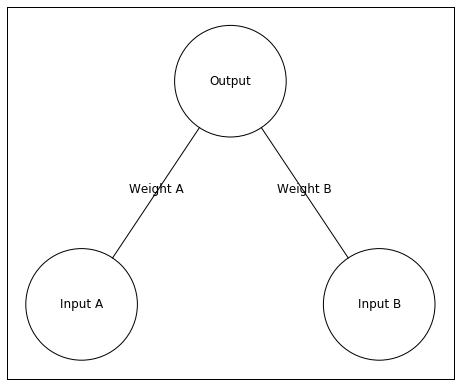

In [5]:
from visualise_neural_network import NeuralNetwork

network = NeuralNetwork() #create neural network object
network.add_layer(2,['Input A','Input B'],['Weight A','Weight B']) #create the input layer which has two neurons.
#Each input neuron has a single line extending to the next layer up
network.add_layer(1,['Output']) #create output layer - a single output neuron
network.draw() #draw the network

Above is our neural network. It has two input neurons and a single output neuron. In this example, I'll give the network an input of [0 1]. This means Input A will receive an input value of 0 and Input B will have an input value of 1. 

The input is the input unit's *activity.* This activity is sent to the Output unit, but the activity changes when traveling to the Output unit. The *weights* between the input and output units change the activity. A large positive weight between the input and output units causes the input unit to send a large positive (excitatory) signal. A large negative weight between the input and output units causes the input unit to send a large negative (inhibitory) signal. A weight near zero means the input unit does not influence the output unit. 

In order to know the Output unit's activity, we need to know its input. I will refer to the output unit's input as $net_{Output}$. Here is how we can calculate $net_{Output}$

$net_{Output} = Input_A * Weight_A + Input_B * Weight_B$

a more general way of writing this is 

$net = \displaystyle\sum_{i=1}^{Inputs}Input_i * Weight_i$

Let's pretend the inputs are [0 1] and the Weights are [0.25 0.5]. Here is the input to the output neuron - 

$net_{Output} = 0 * 0.25 + 1 * 0.5$

Thus, the input to the output neuron is 0.5. A quick way of programming this is through the function numpy.dot which finds the [dot product](https://en.wikipedia.org/wiki/Dot_product) of two vectors (or matrices). This might sound a little scary, but in this case its just multiplying the items by each other and then summing everything up - like we did above.

In [46]:
Inputs = np.array([0, 1])
Weights = np.array([0.25, 0.5])

net_Output = np.dot(Inputs,Weights)
print net_Output

0.5


All this is good, but we haven't actually calculated the output unit's activity we have only calculated its input. What makes neural networks able to solve complex problems is they include a non-linearity when translating the input into activity. In this case we will translate the input into activity by putting the input through a [logistic function](https://en.wikipedia.org/wiki/Logistic_function). 

$Logistic = \frac{1}{1+e^{-x}}$

In [47]:
def logistic(x): #each neuron has a logistic activation function
    return 1.0/(1+np.exp(-x))

Lets take a look at a logistic function.

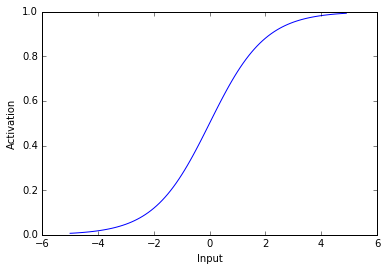

In [48]:
x = np.arange(-5,5,0.1) #create vector of numbers between -5 and 5
plt.plot(x,logistic(x))
plt.ylabel('Activation')
plt.xlabel('Input');

As you can see above, the logistic used here transforms negative values into values near 0 and positive values into values near 1 (remember positive weights excite a neuron and negative weights inhibit a neuron). The most important aspect of this activation function is that its non-linear - it's not a straight line. 

Now lets see the activity of our output neuron. Remember, the net input is 0.5

0.622459331202


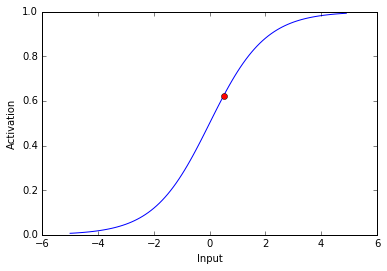

In [49]:
Output_neuron = logistic(net_Output)
print Output_neuron
plt.plot(x,logistic(x));
plt.ylabel('Activation')
plt.xlabel('Input')
plt.plot(net_Output,Output_neuron,'ro');

The activity of our output neuron is depicted as the red dot.

So far I've described how to find a unit's activity, but I haven't described how to find the weights of connections between units. In the example above, I chose the weights to be 0.25 and 0.5, but I can't arbitrarily decide weights unless I already know the solution to the problem. If I want the network to find a solution for me, I need the network to find the weights itself. 

In order to find the weights of connections between neurons, I will use an algorithm called [backpropogation](https://en.wikipedia.org/wiki/Backpropagation). In backpropogation, we have the neural network guess the answer to a problem and adjust the weights so that this guess gets closer and closer to the correct answer. Backpropogation is the method by which we reduce the distance between guesses and the correct answer. After many iterations of guesses by the neural network and weight adjustments through backpropogation, the network can learn an answer to a problem.

Lets say we want our neural network to give an answer of 0 when the left input unit is active and an answer of 1 when the right unit is active. In this case the inputs I will use are [1,0] and [0,1]. The corresponding correct answers will be [0] and [1]. 

Lets see how close our network is to the correct answer. I am using the weights from above ([0.25, 0.5]). 

[0.56217650088579807, 0.62245933120185459]


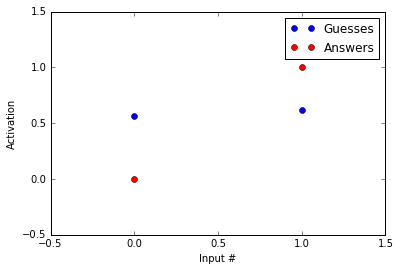

In [50]:
Inputs = [[1,0],[0,1]]
Answers = [0,1,]

Guesses = [logistic(np.dot(x,Weights)) for x in Inputs] #loop through inputs and find logistic(sum(input*weights))
plt.plot(Guesses,'bo')
plt.plot(Answers,'ro')
plt.axis([-0.5,1.5,-0.5,1.5])
plt.ylabel('Activation')
plt.xlabel('Input #')
plt.legend(['Guesses','Answers']);
print Guesses

The guesses are in blue and the answers are in red. As you can tell, the guesses and the answers look almost nothing alike. Our network likes to guess around 0.6 while the correct answer is 0 in the first example and 1 in the second. 

Lets look at how backpropogation reduces the distance between our guesses and the correct answers. 

First, we want to know how the amount of error changes with an adjustment to a given weight. We can write this as 

$\partial Error \over \partial Weight_{Input_{1}\to.Output}$

This change in error with changes in the weights has a number of different sub components. 

* Changes in error with changes in the output unit's activity: $\partial Error \over \partial Output$
* Changes in the output unit's activity with changes in this unit's input: $\partial Output \over \partial net_{Output}$
* Changes in the output unit's input with changes in the weight: $\partial net_{Output} \over \partial Weight_{Input_{1}\to.Output}$

Through the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) we know 

$\frac{\partial Error}{\partial Weight_{Input_{1}\to.Output}} = \frac{\partial Error}{\partial Output} * \frac{\partial Output}{\partial net_{Output}} * \frac{\partial net_{Output}}{\partial Weight_{Input_{1}\to.Output}}$

This might look scary, but with a little thought it should make sense: (starting with the final term and moving left) When we change the weight of a connection to a unit, we change the input to that unit. When we change the input to a unit, we change its activity (written Output above). When we change a units activity, we change the amount of error.

Let's break this down using our example. During this portion, I am going to gloss over some details about how exactly to derive the partial derivatives. [Wikipedia has a more complete derivation](https://en.wikipedia.org/wiki/Delta_rule).  

In the first example, the input is [1,0] and the correct answer is [0]. Our network's guess in this example was about 0.56.

$\frac{\partial Error}{\partial Output} = -(target-Output) = -(0-0.56)$ 

$\frac{\partial Output}{\partial net_{Output}} = Output(1-Output) = 0.56*(1-0.56)$ - Please note that this is specific to our example with a logistic activation function

$\frac{\partial net_{Output}}{\partial Weight_{Input_{1}\to.Output}} = Input_{1} = 1$

to summarize (the numbers used here are approximate)

$\frac{\partial Error}{\partial Weight_{Input_{1}\to.Output}} = -(target-Output) * Output(1-Output) * Input_{1} = -(0-0.56) * 0.56(1-0.56) * 1 = 0.14$

This is the direction we want to move in, but taking large steps in this direction can prevent us from finding the optimal weights. For this reason, we reduce our step size. We will reduce our step size with a parameter called the *learning rate* ($\alpha$). $\alpha$ is bound between 0 and 1. 

Here is how we can write our change in weights

$\Delta Weight_{Input_{1}\to.Output} = \alpha * \frac{\partial Error}{\partial Weight_{Input_{1}\to.Output}}$

This is known as the [delta rule](https://en.wikipedia.org/wiki/Delta_rule). 

We will set $\alpha$ to be 0.5. Here is how we will calculate the new $Weight_{Input_{1}\to.Output}$.

$Weight_{Input_{1}\to.Output}^{\prime} = Weight_{Input_{1}\to.Output} - 0.5 * 0.14 = 0.25 - 0.5 * 0.14 = 0.18$

Thus, $Weight_{Input_{1}\to.Output}$ is shrinking which will move the output towards 0. Below I write the code to implement our backpropogation. 

In [51]:
alpha = 0.5

def delta_Output(target,Output):
    return -(target-Output)*Output*(1-Output) #find the amount of error and derivative of activation function

def update_weights(alpha,delta,unit_input):
    return alpha*np.outer(delta,unit_input) #multiply delta output by all the inputs and then multiply these by the learning rate 

Above I use the [outer product](https://en.wikipedia.org/wiki/Outer_product) of our delta function and the input in order to spread the weight changes to all lines connecting to the output unit.

Okay, hopefully you made it through that. I promise thats as bad as it gets. Now that we've gotten through the nasty stuff, lets use backpropogation to find an answer to our problem. 

In [52]:
def network_guess(Input,Weights):
    return logistic(np.dot(Input,Weights.T)) #input by weights then through a logistic

def back_prop(Input,Output,target,Weights):
    delta = delta_Output(target,Output) #find delta portion
    delta_weight = update_weights(alpha,delta,Input) #find amount to update weights
    Weights = np.atleast_2d(Weights) #convert weights to array
    Weights += -delta_weight #update weights
    return Weights

from random import choice, seed
seed(1) #seed random number generator so that these results can be replicated

Weights = np.array([0.25, 0.5])

Error = []
while True:
    
    Trial_Type = choice([0,1]) #generate random number to choose between the two inputs
    
    Input = np.atleast_2d(Inputs[Trial_Type]) #choose input and convert to array
    Answer = Answers[Trial_Type] #get the correct answer
    
    Output = network_guess(Input,Weights) #compute the networks guess
    Weights = back_prop(Input,Output,Answer,Weights) #change the weights based on the error
    
    Error.append(abs(Output-Answer)) #record error
    
    if len(Error) > 6 and np.mean(Error[-5:]) < 0.05: break #tell the code to stop iterating when mean error is < 0.05 in the last 5 guesses

It seems our code has found an answer, so lets see how the amount of error changed as the code progressed.

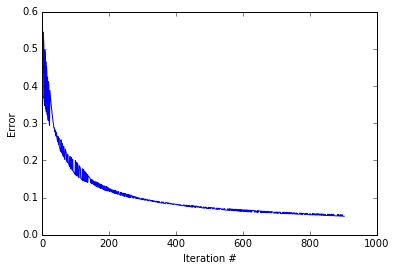

In [53]:
Error_vec = np.array(Error)[:,0]
plt.plot(Error_vec)
plt.ylabel('Error')
plt.xlabel('Iteration #');


It looks like the while loop excecuted about 1000 iterations before converging. As you can see the error decreases. Quickly at first then slowly as the weights zone in on the correct answer. lets see how our guesses compare to the correct answers.

[array([ 0.05420561]), array([ 0.95020512])]


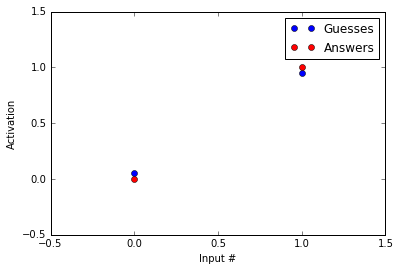

In [54]:
Inputs = [[1,0],[0,1]]
Answers = [0,1,]

Guesses = [logistic(np.dot(x,Weights.T)) for x in Inputs] #loop through inputs and find logistic(sum(input*weights))
plt.plot(Guesses,'bo')
plt.plot(Answers,'ro')
plt.axis([-0.5,1.5,-0.5,1.5])
plt.ylabel('Activation')
plt.xlabel('Input #')
plt.legend(['Guesses','Answers']);
print Guesses

Not bad! Our guesses are much closer to the correct answers than before we started running the backpropogation procedure! Now, you might say, "HEY! But you haven't reached the *correct* answers." That's true, but note that acheiving the values of 0 and 1 with a logistic function are only possible at -$\infty$ and $\infty$, respectively. Because of this, we treat 0.05 as 0 and 0.95 as 1.

Okay, all this is great, but that was a really simple problem, and I said that neural networks could solve interesting problems! 

Well... this post is already longer than I anticipated. I will follow-up this post with another post explaining how we can expand neural networks to solve more interesting problems. 